In [28]:
import pandas as pd 
import numpy as np 

weapons = pd.read_csv("C:/Users/jaram/DS/Capstone/weapons.csv")
weapons.head()


,Unnamed: 0,Weapon,Category,Cost,Tier,Score,Trend,Win %,Pick %,Dmg/Round,KDA,Patch,Rank
0,0,aresAres,HEAVY,1600,Not Placed,0.0,NEW,0.00%,0.00%,0.0,0.0,1.14,iron
1,1,buckyBucky,SHOTGUN,900,Not Placed,0.0,NEW,0.00%,0.00%,0.0,0.0,1.14,iron
2,2,bulldogBulldog,RIFLE,2100,Not Placed,0.0,NEW,0.00%,0.00%,0.0,0.0,1.14,iron
3,3,classicClassic,SIDEARM,0,Not Placed,0.0,NEW,0.00%,0.00%,0.0,0.0,1.14,iron
4,4,frenzyFrenzy,SIDEARM,400,Not Placed,0.0,NEW,0.00%,0.00%,0.0,0.0,1.14,iron


In [29]:
weapons.dtypes #Check types 

Unnamed: 0      int64
Weapon         object
Category       object
Cost            int64
Tier           object
Score         float64
Trend          object
Win %          object
Pick %         object
Dmg/Round     float64
KDA           float64
Patch         float64
Rank           object
dtype: object

In [30]:
#Cleaning: Drop rows with no data, and id column 
weapons = weapons.drop(columns = ['Unnamed: 0', 'Trend'])
weapons = weapons[weapons.Score != 0.0]
weapons.head()



,Weapon,Category,Cost,Tier,Score,Win %,Pick %,Dmg/Round,KDA,Patch,Rank
18,aresAres,HEAVY,1600,Fair / B,45.90,47.22%,2.33%,79.60,1.17,1.14,silver
19,buckyBucky,SHOTGUN,900,Weak / C,32.45,45.25%,1.84%,58.11,0.87,1.14,silver
20,bulldogBulldog,RIFLE,2100,Fair / B,44.79,47.46%,1.21%,78.48,1.09,1.14,silver
21,classicClassic,SIDEARM,0,Weak / C,21.39,41.57%,9.12%,42.72,0.80,1.14,silver
22,frenzyFrenzy,SIDEARM,400,Fair / B,44.91,47.94%,1.55%,66.80,1.15,1.14,silver


In [31]:
weapons.columns

Index(['Weapon', 'Category', 'Cost', 'Tier', 'Score', 'Win %', 'Pick %',
       'Dmg/Round', 'KDA', 'Patch', 'Rank'],
      dtype='object')

In [32]:
#Clean up weapons 
import re 
def fix_weapons(a):
    return a[len(a)//2:]


weapons.Weapon = weapons.Weapon.apply(fix_weapons)
weapons.Weapon.unique()
weapons = weapons[weapons.Rank != 'iron'] #No iron data 

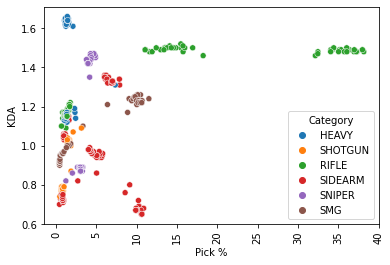

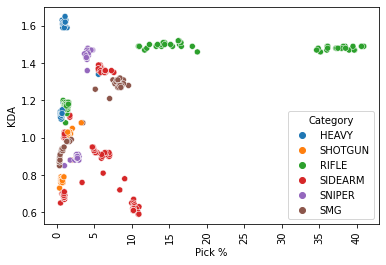

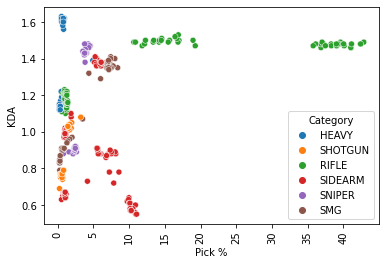

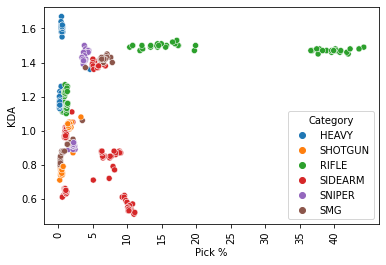

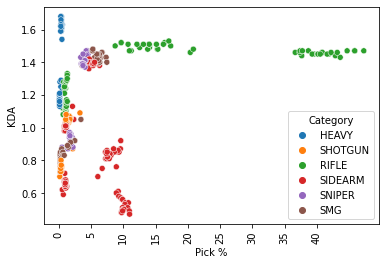

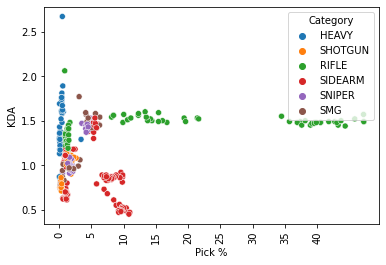

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
ranks = ['silver', 'gold', 'platinum', 'diamond', 'immortal', 'radiant'] #all ranks in order of skill ascending 
for rank in ranks: 
    temp = weapons[weapons.Category != 'MELEE']
    sns.scatterplot(data = temp[temp.Rank == rank], x = 'Pick %', y = 'KDA', hue = 'Category')
    plt.xticks(rotation = 90)
    plt.xticks([0,5, 10, 15, 20, 25, 30, 35, 40])
    plt.show()

In [34]:
#More type cleaning 
def p2f(x):
    return float(x.strip('%'))

weapons['Win %'] =weapons['Win %'].apply(p2f)
weapons['Pick %'] =weapons['Pick %'].apply(p2f)


In [35]:
import pprint
pp = pprint.PrettyPrinter(depth=6)
table = weapons[['Rank', 'Dmg/Round', 'KDA']].groupby('Rank').mean()
pp.pprint(table)

          Dmg/Round       KDA
Rank                         
diamond   78.265000  1.071329
gold      78.885362  1.074372
immortal  77.949952  1.074686
platinum  78.591353  1.071546
radiant   80.775278  1.115351
silver    79.251449  1.082560


In [36]:
weapons.head()

,Weapon,Category,Cost,Tier,Score,Win %,Pick %,Dmg/Round,KDA,Patch,Rank
18,Ares,HEAVY,1600,Fair / B,45.90,47.22,2.33,79.60,1.17,1.14,silver
19,Bucky,SHOTGUN,900,Weak / C,32.45,45.25,1.84,58.11,0.87,1.14,silver
20,Bulldog,RIFLE,2100,Fair / B,44.79,47.46,1.21,78.48,1.09,1.14,silver
21,Classic,SIDEARM,0,Weak / C,21.39,41.57,9.12,42.72,0.80,1.14,silver
22,Frenzy,SIDEARM,400,Fair / B,44.91,47.94,1.55,66.80,1.15,1.14,silver


In [39]:
weapons[['Win %', 'Pick %', 'Dmg/Round', 'KDA', 'Category' ]].groupby('Category').mean()

,Win %,Pick %,Dmg/Round,KDA
Category,,,,
HEAVY,52.839891,0.708007,94.076558,1.407283
MELEE,50.195507,100.000000,0.152899,0.301522
RIFLE,52.049384,13.909330,115.713913,1.339040
SHOTGUN,44.752836,1.114982,63.587091,0.905818
SIDEARM,41.899246,4.904928,58.647435,0.912435
SMG,48.033261,3.969819,71.469601,1.131558
SNIPER,50.313442,3.169638,103.259203,1.179420


Note that Heavy Weapons and Rifles have the highest win percentage, even though heavy weapons are the least popular 

In [43]:
#Make tiering binary for modeling purposes 
def set_tiers(tier):
    if tier in ['Fair / B', 'Weak / C', 'Good / A','Bad / D']:
        return(0)

    else:
        return(1)





In [44]:
weapons['Tier'] = weapons['Tier'].apply(set_tiers)


([<matplotlib.axis.XTick at 0x26b5b3e1c70>,
 [Text(0, 0, ''), Text(0, 0, '')])

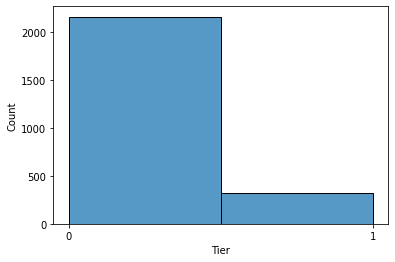

In [53]:
sns.histplot(data = weapons, x = 'Tier', bins = 2)
plt.xticks(np.arange(0, 2, 1.0))

In [71]:
table = weapons[['Tier', 'Win %', 'Patch']].groupby(['Patch', 'Tier']).mean()


In [72]:
table 

Win %
Patch Tier           
1.14  0     46.018571
      1     54.435000
2.11  0     45.217857
      1     54.520833
3.12  0     46.497553
      1     53.233571
4.00  0     48.102872
      1     52.934615
4.01  0     46.896237
      1     53.336000
4.02  0     46.897158
      1     53.173077
4.03  0     46.829255
      1     53.320714
4.04  0     46.761170
      1     53.349286
4.05  0     46.960842
      1     53.159231
4.07  0     47.044583
      1     52.899167
4.08  0     46.839894
      1     53.226429
4.09  0     46.582316
      1     53.043846
4.10  0     47.445521
      1     52.445000
4.11  0     47.104271
      1     52.852500
5.00  0     47.271979
      1     52.823333
5.01  0     47.146354
      1     52.696667
5.03  0     46.617634
      1     53.430000
5.04  0     46.864681
      1     53.180000
5.05  0     46.878617
      1     53.190714
5.06  0     47.318316
      1     53.016154
5.07  0     47.356458
      1     52.784167
5.08  0     47.366146
      1     52.447500
5.09  0     47.445521
      1     52.445000

In [70]:
weapons[['Tier', 'Win %']].groupby([ 'Tier']).mean() 

,Win %
Tier,
0,46.948074
1,53.236563


In [84]:
weapons.head()

,Weapon,Category,Cost,Tier,Score,Win %,Pick %,Dmg/Round,KDA,Patch,Rank
18,Ares,HEAVY,1600,0,45.90,47.22,2.33,79.60,1.17,1.14,silver
19,Bucky,SHOTGUN,900,0,32.45,45.25,1.84,58.11,0.87,1.14,silver
20,Bulldog,RIFLE,2100,0,44.79,47.46,1.21,78.48,1.09,1.14,silver
21,Classic,SIDEARM,0,0,21.39,41.57,9.12,42.72,0.80,1.14,silver
22,Frenzy,SIDEARM,400,0,44.91,47.94,1.55,66.80,1.15,1.14,silver
